<center> <font size = '8', color = 'green'> Predicting Medical insurance charges

<font size='4'>In this code we are going to used different features to predict the  health insurance premium . 

Here are the feature that we are going to use
​
* **age:** age of primary beneficiary
​
* **sex:** insurance contractor gender, female, male
​
* **bmi:** Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
​
* **children:** Number of children covered by health insurance / Number of dependents
​
* **smoker:** Smoking
​
* **region:** the beneficiary's residential area , northeast, southeast, southwest, northwest

<font size='6'><center>Starting of the notebook</center>


In [223]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler


In [224]:
# read the dataset
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [225]:
# check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [226]:
# check for summary statistics
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [227]:
# check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## exploratory data analytics

### univariate analysis

In [228]:
# function to plot the distribution of a variable
def plot_distribution(data, feature):
    """
    Plot the distribution of a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to plot.

    Returns:
    None
    """
    plt.figure(figsize=(8,5))
    plt.title("Distribution of %s" % feature)
    sns.histplot(data[feature].dropna(), kde=True, bins=100)
    plt.show()

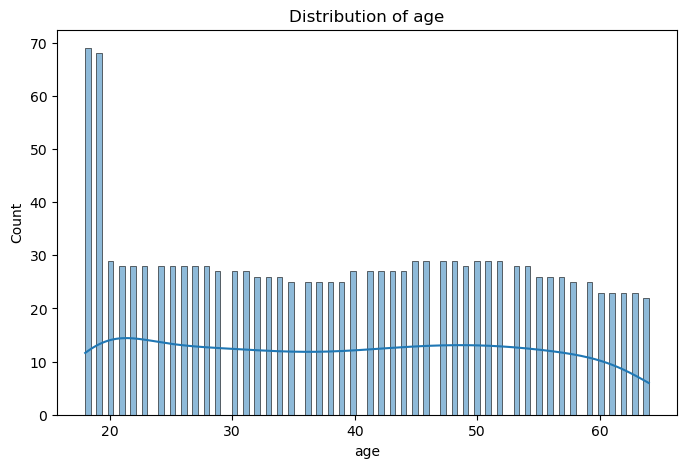

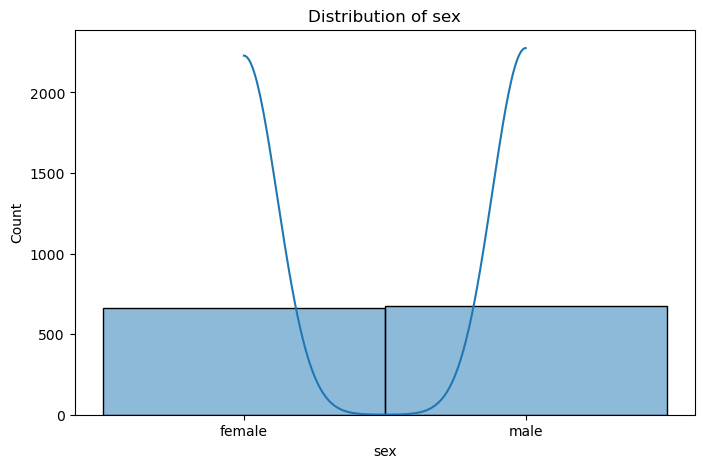

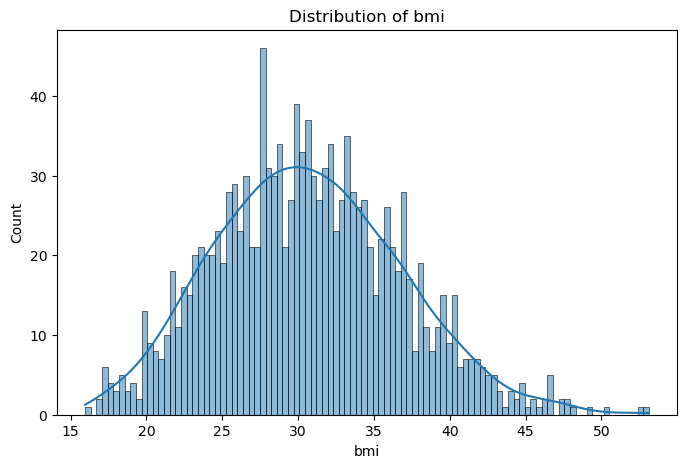

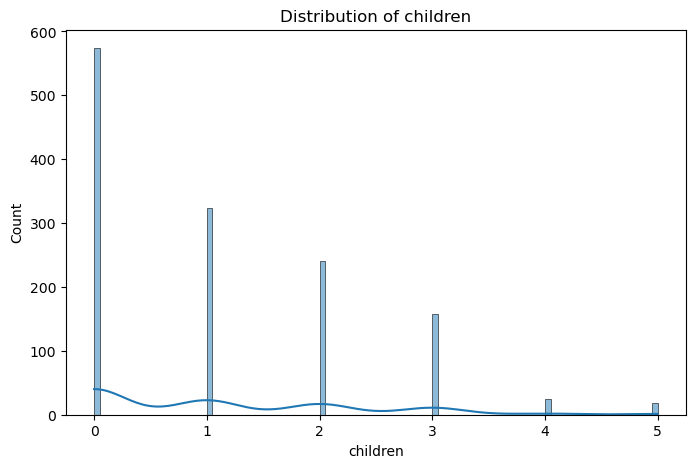

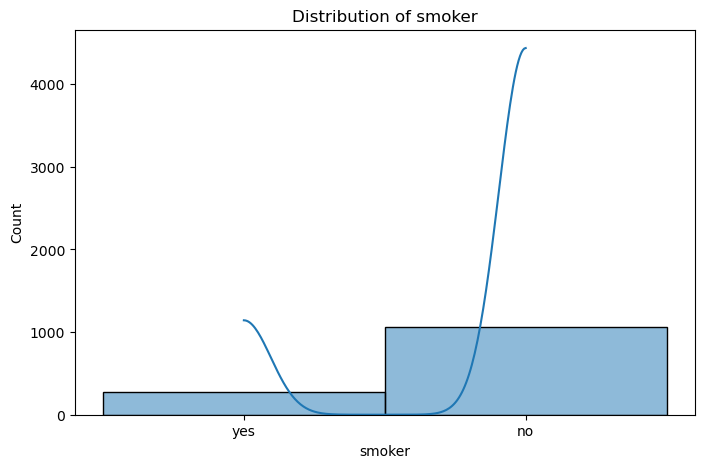

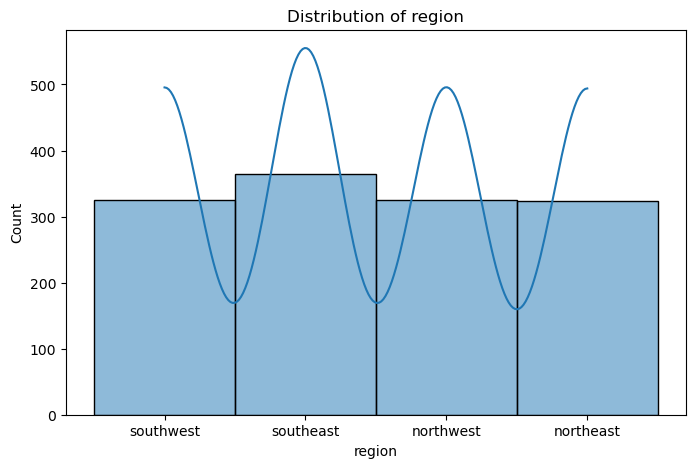

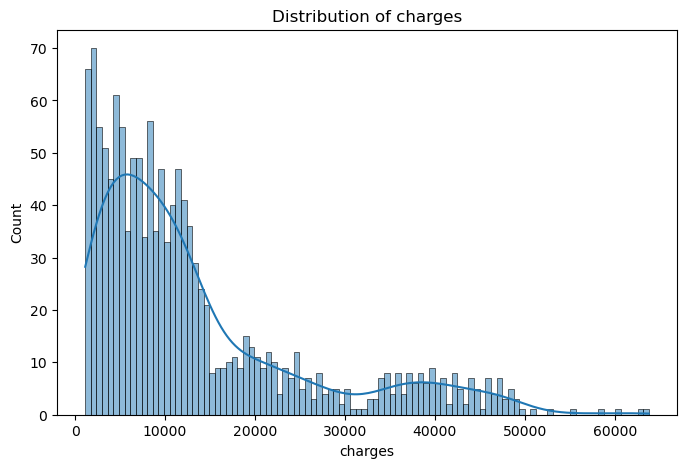

In [229]:
# plot distribution of all features
for feature in df.columns:
    plot_distribution(df, feature)

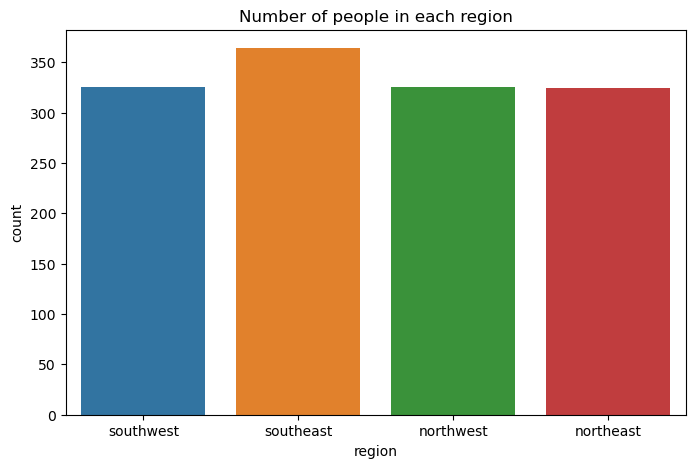

In [230]:
# plot a table showing number of people in each region
plt.figure(figsize=(8,5))
sns.countplot(x='region', data=df)
plt.title('Number of people in each region')
plt.show()

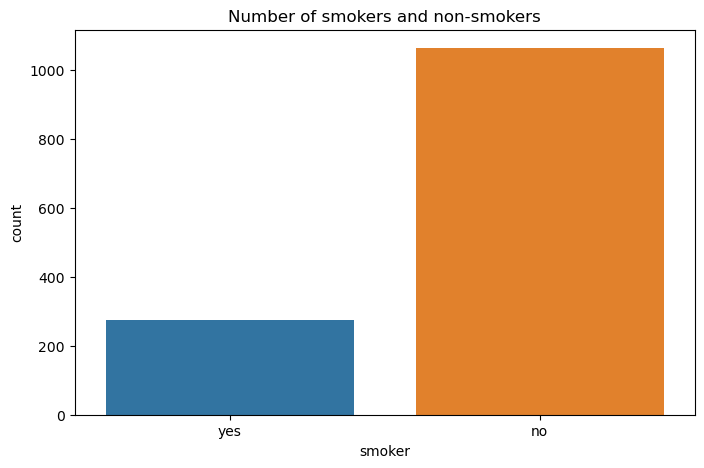

In [231]:
# plot a table showing number of smokers and non-smokers
plt.figure(figsize=(8,5))
sns.countplot(x='smoker', data=df)
plt.title('Number of smokers and non-smokers')
plt.show()


### Bi-variate Analysis

In [232]:
# a function which check effects of a feature on the target variable
def feature_effect(data, feature):
    """
    Check the effect of a given feature on the target variable.

    Parameters:
    data (pandas.DataFrame): The data containing the features.
    feature (str): The name of the feature to check.

    Returns:
    None
    """
    plt.figure(figsize=(8,5))
    sns.barplot(x=feature, y='charges', data=data)
    plt.title("Effect of %s on charges" % feature)
    plt.show()


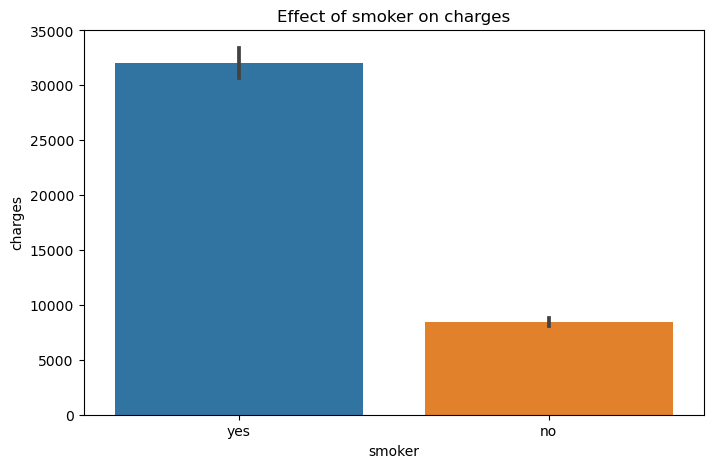

In [233]:
# check the effect of smoker on charges
feature_effect(df, 'smoker')

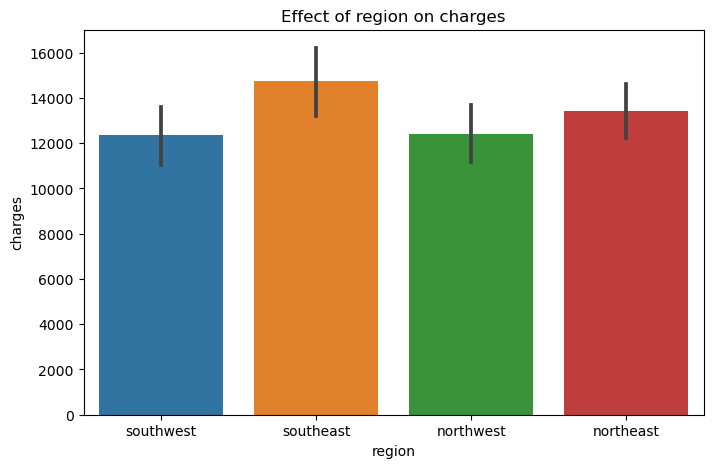

In [234]:
# check the effect of region on charges
feature_effect(df, 'region')


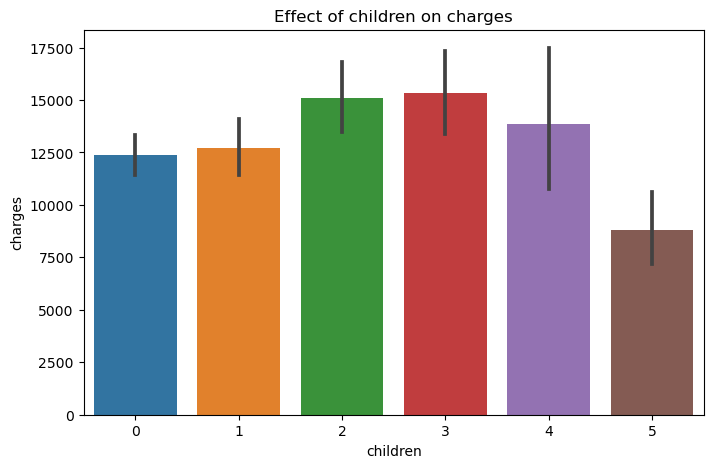

In [235]:
# check the of children on charges
feature_effect(df, 'children')

<Figure size 800x500 with 0 Axes>

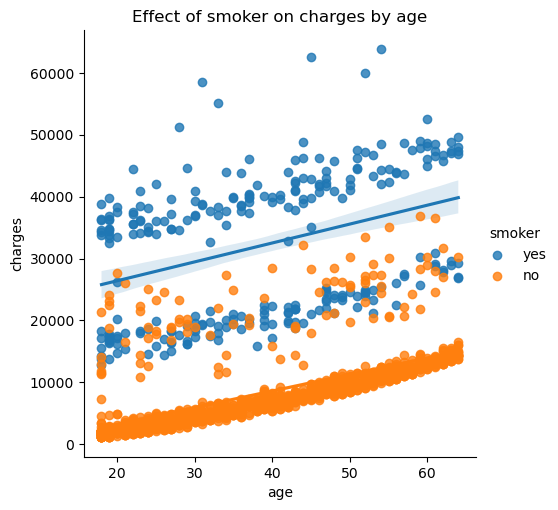

In [236]:
# check the effect of smoker on charges by age
plt.figure(figsize=(8,5))
sns.lmplot(x='age', y='charges', hue='smoker', data=df)
plt.title('Effect of smoker on charges by age')
plt.show()

<Figure size 800x500 with 0 Axes>

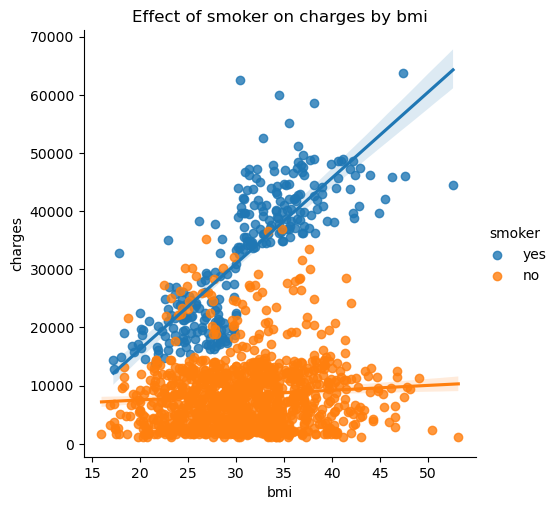

In [237]:
# check effect of bmi on charges by smoker
plt.figure(figsize=(8,5))
sns.lmplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title('Effect of smoker on charges by bmi')
plt.show()

In [238]:
# From the above plots, we can see that the smoker feature has a high significant effect on the charges. If someone smokes, the charges are significantly higher than if they do not smoke.
# We can also see that the region feature has a slight effect on the charges.
# The number of children does not have a significant effect on the charges.
# The age feature has a significant effect on the charges. As the age increases, the charges also increase.
# The bmi feature has a slight effect on the charges. As the bmi increases, the charges also increase.


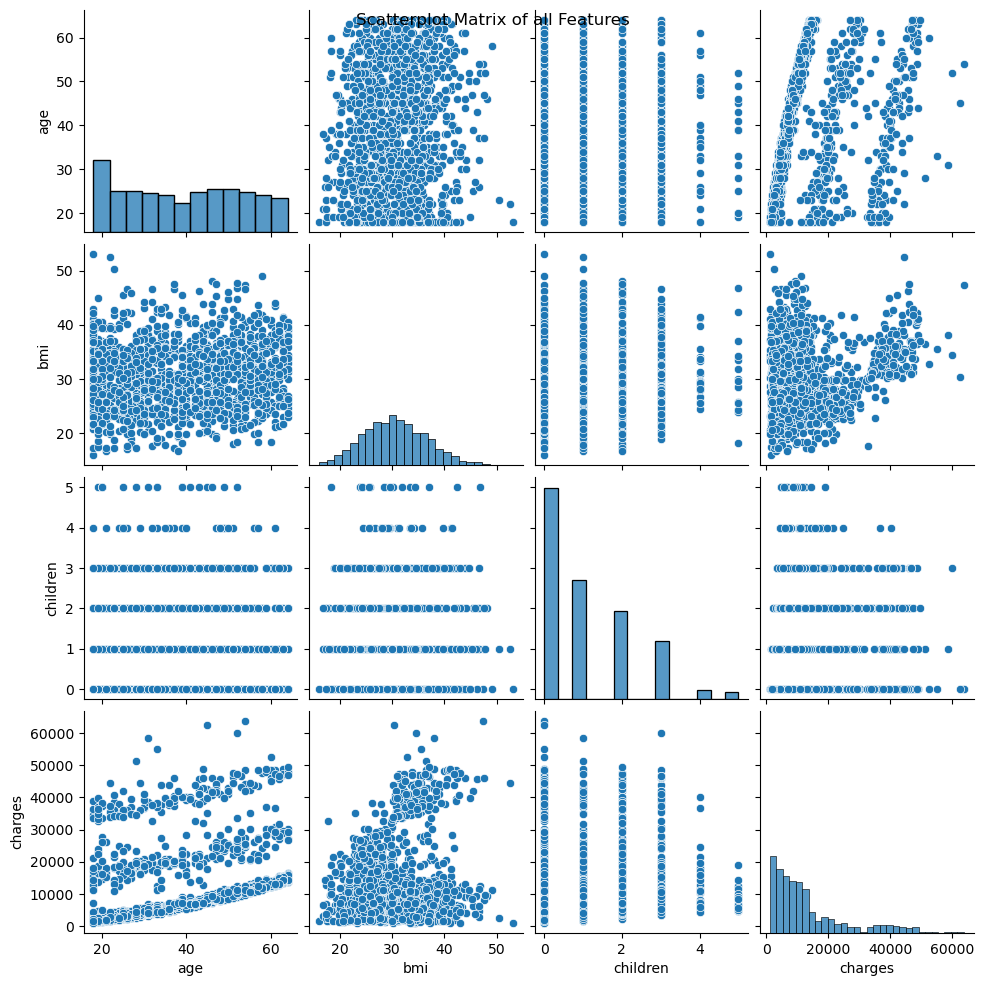

In [239]:
# Visualize the relationship among all features using a scatterplot matrix
sns.pairplot(df)
plt.suptitle("Scatterplot Matrix of all Features")
plt.show()



## Feature engineering

In [240]:
# function that uses skliearrn to do label encoding
def label_encode(data, feature):
    """
    Label encode a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to encode.

    Returns:
    data (pandas.DataFrame): The data with the feature label encoded.
    label_encoder (sklearn.preprocessing.LabelEncoder): The label encoder used.
    """
    label_encoder = LabelEncoder()
    data[feature] = label_encoder.fit_transform(data[feature])
    return data, label_encoder


In [241]:
# label encode the categorical features
df, label_encoder_1 = label_encode(df, 'sex')
df, label_encoder_2 = label_encode(df, 'smoker')
df, label_encoder_3 = label_encode(df, 'region')
label_encoder_1.classes_, label_encoder_2.classes_, label_encoder_3.classes_

(array(['female', 'male'], dtype=object),
 array(['no', 'yes'], dtype=object),
 array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object))

In [242]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


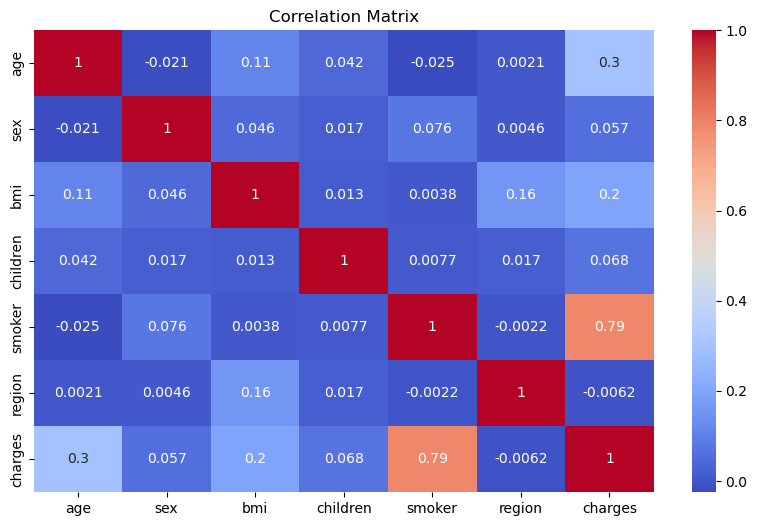

In [243]:
# plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<font size = '5'>From the above heatmap, we can see that the smoker feature has the highest correlation with the charges feature.
The age feature also has a high correlation with the charges feature, and 
the bmi feature has a slight correlation with the charges feature.


In [244]:
# define a function that do one hot encoding
def one_hot_encode(data, feature):
    """
    One hot encode a given feature in the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the feature.
    feature (str): The name of the feature to encode.

    Returns:
    data (pandas.DataFrame): The data with the feature one hot encoded.
    """
    data = pd.get_dummies(data, columns=[feature], drop_first=True)
    return data


## Build the model

In [245]:
# define a function to extract features and target variable
def extract_features_target(data, target_feature):
    """
    Extract the features and target variable from the provided data.

    Parameters:
    data (pandas.DataFrame): The data containing the features and target variable.
    target_feature (str): The name of the target variable.

    Returns:
    X (pandas.DataFrame): The features.
    y (pandas.Series): The target variable.
    """
    X = data.drop(target_feature, axis=1)
    y = data[target_feature]
    return X, y

In [246]:
# get the features and target variable
X,y = extract_features_target(df, 'charges')

In [247]:
# define a function  that does linear regression using cross validation with kfold and return the R2 and RMSE

def linear_regression_cv(X, y, n_splits=5):
   
    # initialize the model
    model = LinearRegression()
    
    # initialize the KFold object
    kf = KFold(n_splits=n_splits)
    
    # perform cross validation
    scores= cross_val_score(model, X, y, scoring='r2', cv=kf)
    rmse=np.sqrt(np.abs( cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf)))

    
    return scores.mean(), rmse.mean()

In [248]:
# perform linear regression using cross validation
r2, rmse = linear_regression_cv(X, y)
print( "Without standadization and one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)  
print("RMSE: %.2f" % rmse)


Without standadization and one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6068.38


### standardize the data

In [249]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[['age', 'bmi']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi']) 
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']


In [250]:
# perform linear regression using cross validation on the standardized data
r2, rmse = linear_regression_cv(X_scaled, y)
print( "With standadization and without one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)

With standadization and without one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6064.83


### One hot encoding

In [251]:
# do one hot encoding
df_encoded = one_hot_encode(df, 'region')
df_encoded.head()

,age,sex,bmi,children,smoker,charges,region_1,region_2,region_3
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


In [252]:
# get the features and target variable
X_encoded, y = extract_features_target(df_encoded, 'charges')
assert len(X_encoded) == len(y)

In [253]:
# With standadization and one hot encoding, perform linear regression using cross validation
r2, rmse = linear_regression_cv(X_encoded, y)
print( "With one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)


With one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6072.41


<font size= 4>From the above results, on all the three cases, the R2 value is the same but the RMSE is the smallest when we use standadization 

## Feature Engineering

In [254]:
# add non-linear features using age
df['age_squared'] = df['age']**2
#df['age_cubed'] = df['age']**3

In [255]:
# get the features and target variable
X, y = extract_features_target(df, 'charges')

In [256]:
# perform linear regression using cross validation
r2, rmse = linear_regression_cv(X, y)
print( "After adding non linear features, The results are as follows:")
print("R2: %.2f" % r2)  
print("RMSE: %.2f" % rmse)


After adding non linear features, The results are as follows:
R2: 0.75
RMSE: 6038.86


In [257]:
# standize the data after adding non-linear features
X_scaled = scaler.fit_transform(X[['age', 'bmi', 'age_squared']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi', 'age_squared'])
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']


In [258]:
# perform linear regression using cross validation on the standardized data
r2, rmse = linear_regression_cv(X_scaled, y)
print( "After adding non linear features and standadization, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)

After adding non linear features and standadization, The results are as follows:
R2: 0.75
RMSE: 6034.38


In [259]:
# do one hot encoding
df_encoded = one_hot_encode(df, 'region')
df_encoded['age_squared'] = df['age']**2


In [260]:
# get the features and target variable
X_encoded, y = extract_features_target(df_encoded, 'charges')

In [261]:
# With one hot encoding, perform linear regression using cross validation
r2, rmse = linear_regression_cv(X_encoded, y)
print( "After adding non linear features and one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)


After adding non linear features and one hot encoding, The results are as follows:
R2: 0.75
RMSE: 6042.28


After adding non-linear features and using standardization, we still have the same R2 but the RMSE has decreased to 6034. This means that the model is performing better in terms of RMSE.

In [262]:
# crete a feature that shows if a person is a smoker and has a bmi greater than 30
df['smoker_obese']= (df['smoker']==1) & (df['bmi']>30)
df['smoker_obese'] = df['smoker_obese'].astype(int)

# show me the cont of the new feature
df['smoker_obese'].value_counts()

0    1194
1     144
Name: smoker_obese, dtype: int64

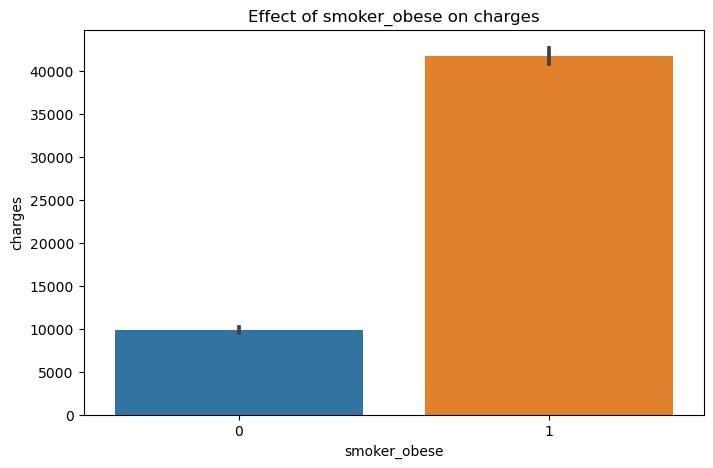

In [264]:
# plot the effect of the new feature on charges
feature_effect(df, 'smoker_obese')

In [265]:
# get the features and target variable
X, y = extract_features_target(df, 'charges')

In [266]:
# perform linear regression using cross validation with the new features
r2, rmse = linear_regression_cv(X, y)
print( "After adding the new feature and the non linear feature, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)


After adding the new feature and the non linear feature, The results are as follows:
R2: 0.86
RMSE: 4421.17


In [267]:
# standize the data after adding non-linear feature and the new feature
X_scaled = scaler.fit_transform(X[['age', 'bmi', 'age_squared', 'smoker_obese']])
X_scaled = pd.DataFrame(X_scaled, columns=['age', 'bmi', 'age_squared', 'smoker_obese'])
X_scaled['children'] = X['children']
X_scaled['smoker'] = X['smoker']
X_scaled['region'] = X['region']

In [268]:
# perform linear regression using cross validation on the standardized data
r2, rmse = linear_regression_cv(X_scaled, y)
print( "After adding the new feature and the non linear feature and standadization, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)

After adding the new feature and the non linear feature and standadization, The results are as follows:
R2: 0.86
RMSE: 4424.60


In [269]:
# do one hot encoding
df_encoded = one_hot_encode(df, 'region')
df_encoded['age_squared'] = df['age']**2
df_encoded['smoker_obese'] = df['smoker_obese']


In [270]:
# get the features and target variable
X_encoded, y = extract_features_target(df_encoded, 'charges')

In [271]:
# With one hot encoding, perform linear regression using cross validation
r2, rmse = linear_regression_cv(X_encoded, y)
print( "After adding the new feature and the non linear feature and one hot encoding, The results are as follows:")
print("R2: %.2f" % r2)
print("RMSE: %.2f" % rmse)

After adding the new feature and the non linear feature and one hot encoding, The results are as follows:
R2: 0.86
RMSE: 4428.09


From the above results, we can see that the best model is the one with the new feature and the non-linear feature. It has the highest R2 and the lowest RMSE. The R2 is 0.86 and the RMSE is 4424.6. This means that the model can explain 86% of the variance in the target variable and the average error is 4424.6. 